# PHSX 331 Homework 1 Solution - Practice with Python.


In [19]:
import numpy
numpy.random.seed(0)
foo = numpy.random.randint(0,100,25)
print (foo)

[44 47 64 67 67  9 83 21 36 87 70 88 88 12 58 65 39 87 46 88 81 37 25 77
 72]


### 1a sum of even numbers

In [20]:
def sum_even(x):
    answer = 0
    for n in x:
        if n%2 == 0: #Check if the number is even
            answer += n
    return answer

In [21]:
sum_even(foo)

666

100% by accident

### 1b. Odd sum

In [22]:
def sum_odd(x):
    answer = 0
    for n in x:
        if n%2 != 0: #If it's not even, then it's odd
            answer += n
    return answer

In [23]:
sum_odd(foo)

792

In [25]:
#Double check our answers
print(sum_even(foo) + sum_odd(foo), sum(foo))

1458 1458


### 2 Finding Fibonacci Numbers

In [37]:
def fib_seq(final):
    fib_num = [0, 1]
    while fib_num[-1] < final:
        fib_num.append(fib_num[-1] + fib_num[-2])
    return fib_num

In [38]:
fib_seq(100)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

So this works but it goes past the max number I want. I only want the Fibonacci numbers less than 100. That's because the 'while' statment doesn't check things until after it appends the next number. So a second take at the program looks like.

In [40]:
def fib_seq2(final):
    fib_num = [0, 1]
    while fib_num[-1] < final:
        next_number = fib_num[-1] + fib_num[-2]
        if next_number > final: #Checks to make sure the next number I add is less than
                                #the max number, if it is less than the max number then
                                #we can add it on, if not, the just end the program there
            return fib_num
        fib_num.append(next_number)

In [45]:
fib_seq2(1000)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

In [42]:
"""
To find the sum of all the even fibonacci numbers I'll just combine my two functions
"""
def fib_sum_even(final):
    fib_num = fib_seq(final) #Run my fib_seq function, and store the answer as a variable fib_num
    return sum_even(fib_num) #Run sum_even with the input being fib_num

In [44]:
fib_sum_even(1000)

798

In [82]:
2**19

524288

### 3 Falling

In [56]:
import numpy as np
def falling(h):
    # Physic 1 equation h = v_0 * t + 1/2 * a * t**2, 
    #v_0 = 0 so we only have 
    # h = 0.5*a*t**2, 
    # REMEMBER h must be in meters
    g = 9.8 #Acceleration from gravity m/s**2
    return np.sqrt(h*2/g)

In [57]:
falling(1)

0.4517539514526256

In [58]:
falling(381) #381 meters = 1250 ft

8.817885349720552

In [59]:
falling(408773) #408773 meters = 254 miles

288.83050604894527

### Extra Creddit

In [60]:
def prime_finder(x):
    prime = True
    i = 2
    while i**2 < x:
        if x%i == 0:
            prime = False
            break
        i +=1 
    return prime


In [61]:
print(prime_finder(5))
print(prime_finder(231))
print(prime_finder(9851))
print(prime_finder(9853))

True
False
True
False


In [62]:
%%timeit
(prime_finder(5))
(prime_finder(231))
(prime_finder(9851))
(prime_finder(9853))

44 µs ± 601 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Side Note
One of the first things that comes up if you google the Fibonacci number question is this program,

In [46]:
def F(n):
    if n == 0: 
        return 0
    elif n == 1: 
        return 1
    else: 
        return F(n-1)+F(n-2)

This will find Fibonacci numbers, but not well. It also doesn't do what we want. I want to find a list of the Fibonacci numbers, and this program will only give me the nth Fibonacci number, and it's really slow at doing that.

Just to show how slow it is at doing that lets run F(n) for a range of different 'n' values and see how much longer it takes to run each time.

In [84]:
for i in range(0,20):
    %timeit F(i)

88.8 ns ± 0.23 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
108 ns ± 4.35 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
311 ns ± 3.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
558 ns ± 8.56 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1 µs ± 6.09 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.7 µs ± 7.82 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.81 µs ± 29.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.59 µs ± 47.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.44 µs ± 40.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.1 µs ± 50.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19.8 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
32.1 µs ± 456 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
52.1 µs ± 439 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
84.2 µs ± 1.15 µs per loop (mea

The Magic command %timeit runs a program multiple times and finds the mean time of how long it takes to run. 

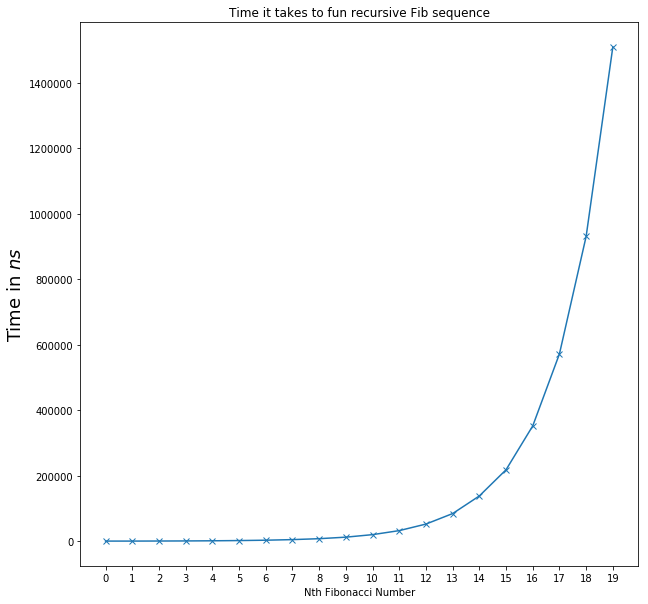

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
x = np.array(range(0,20))
times = [88.8, 100, 311, 558, 1000, 1700,2810,4590, 7440, 12100, 19800,
         32100, 52100, 84200, 138000, 218000, 352000, 572000, 931000, 1510000]
plt.ylabel('Time in $ns$', size = 18)
plt.xlabel('Nth Fibonacci Number')
plt.xticks(range(0,20))
plt.title('Time it takes to fun recursive Fib sequence')
plt.plot(x,times, 'x-')

/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf